In [ ]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import keras
tf.disable_v2_behavior()
import numpy as np
import sklearn

In [ ]:
tf.reset_default_graph()
a = tf.placeholder(np.float32, (2, 2))
b = tf.Variable(tf.ones((2, 2)))
c = a @ b

In [ ]:
print(c)

Tensor("matmul:0", shape=(2, 2), dtype=float32)


In [ ]:
s = tf.InteractiveSession()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
s.run(tf.global_variables_initializer())
s.run(c, feed_dict={a: np.ones((2,2))})

array([[2., 2.],
       [2., 2.]], dtype=float32)

In [ ]:
s.close()

In [ ]:
tf.reset_default_graph()
x = tf.get_variable("x", shape=(), dtype= tf.float32, trainable= True)
f = x ** 2

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(0.1)
step = optimizer.minimize(f, var_list=[x])

In [ ]:
tf.trainable_variables()

[<tf.Variable 'x:0' shape=() dtype=float32_ref>]

In [ ]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    for i in range(10):
        _, curr_x, curr_f = s.run([step, x, f])
        print(curr_x, curr_f)

-0.9025615 1.2728394
-0.7220492 0.8146172
-0.57763934 0.52135503
-0.46211147 0.33366722
-0.36968917 0.213547
-0.29575133 0.13667008
-0.23660107 0.08746885
-0.18928085 0.055980068
-0.15142468 0.03582724
-0.12113974 0.022929432


In [ ]:
tf.reset_default_graph()
x = tf.get_variable("x", dtype= tf.float32, shape= ())
f = x ** 2
f = tf.Print(f, [x, f], "x, f: ")

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(0.1)
step = optimizer.minimize(f, var_list=[x])

In [ ]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    for i in range(10):
        s.run([step, f])

In [ ]:
tf.reset_default_graph()
x = tf.get_variable("x", shape=(), dtype=tf.float32)
f = x ** 2

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(0.1)
step = optimizer.minimize(f)

In [ ]:
tf.summary.scalar('curr_x', x)
tf.summary.scalar('curr_f', f)
summaries = tf.summary.merge_all()

In [ ]:
s = tf.InteractiveSession()
summary_writer = tf.summary.FileWriter("logs/1", s.graph)
s.run(tf.global_variables_initializer())
for i in range(10):
    _, curr_summaries = s.run([step, summaries])
    summary_writer.add_summary(curr_summaries, i)
    summary_writer.flush()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
N = 1000
D = 3
x = np.random.random((N, D))
w = np.random.random((D, 1))
y = x @ w + np.random.randn(N, 1) * 0.20

print(x.shape, y.shape)
print(w.T)

(1000, 3) (1000, 1)
[[0.38157316 0.51897726 0.78206386]]


In [ ]:
tf.reset_default_graph()

features = tf.placeholder(tf.float32, shape=(None, D))
target = tf.placeholder(tf.float32, shape=(None, 1))

weights = tf.get_variable("weights", shape=(D, 1), dtype= tf.float32)
predictions = features @ weights

loss = tf.reduce_mean((target - predictions) ** 2)
print(target.shape, predictions.shape, loss.shape)

(?, 1) (?, 1) ()


In [ ]:
optimizer = tf.train.GradientDescentOptimizer(0.1)
step = optimizer.minimize(loss)

In [ ]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    for i in range(300):
        _, curr_loss, curr_weights = s.run([step, loss, weights], feed_dict={features: x, target: y})
        if i % 50 == 0:
            print(curr_loss)

0.7789816
0.048257492
0.041271582
0.040013526
0.03978636
0.03974523


In [ ]:
import sys
sys.path.append("../..")

In [ ]:
def sum_python(N):
    return np.sum(np.arange(N) ** 2)

In [ ]:
%%time
sum_python(10 ** 5)

CPU times: user 7.3 ms, sys: 918 µs, total: 8.22 ms
Wall time: 9.73 ms


333328333350000

In [ ]:
my_scalar = tf.placeholder(dtype= tf.float32)

scalar_squared = my_scalar ** 2

derivatives = tf.gradients(scalar_squared, [my_scalar])

derivatives

[<tf.Tensor 'gradients_1/pow_1_grad/Reshape:0' shape=<unknown> dtype=float32>]

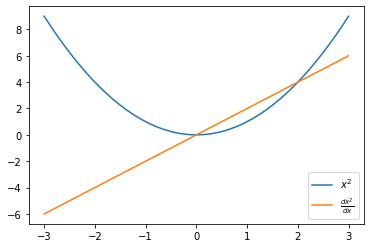

In [ ]:
%matplotlib inline

x = np.linspace(-3, 3)

with tf.Session() as s:
    x_squared, x_squared_der = s.run([scalar_squared, derivatives[0]], {my_scalar: x})

    plt.plot(x, x_squared,label="$x^2$")
    plt.plot(x, x_squared_der, label=r"$\frac{dx^2}{dx}$")
    plt.legend()



In [ ]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.

X_train, X_val = X_train[:-10000], X_train[-10000:]
y_train, y_val = Y_train[:-10000], Y_train[-10000:]

X_train [shape (50000, 28, 28)] sample patch:
 [[0.         0.         0.         0.17647059 0.8745098 ]
 [0.         0.         0.         0.         0.12156863]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.01960784 0.29411765 0.03529412 0.        ]]
A closeup of a sample patch:


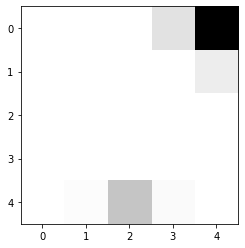

And the whole sample:


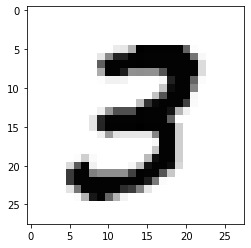

y_train [shape (50000,)] 10 samples:
 [5 0 4 1 9 2 1 3 1 4]


In [ ]:
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[7, 15:20, 5:10])
print("A closeup of a sample patch:")
plt.imshow(X_train[7, 15:20, 5:10], cmap="Greys")
plt.show()
print("And the whole sample:")
plt.imshow(X_train[7], cmap="Greys")
plt.show()
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])

In [ ]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print(X_train_flat.shape)

X_val_flat = X_val.reshape((X_val.shape[0], -1))
print(X_val_flat.shape)

(50000, 784)
(10000, 784)


In [ ]:
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:3], y_train[:3])

(50000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] [5 0 4]


In [ ]:
W = tf.get_variable('W', shape=(784, 10), initializer=tf.initializers.glorot_uniform())
b = tf.get_variable('b', shape=(10,), initializer=tf.zeros_initializer())

In [ ]:
input_X = tf.placeholder(tf.float32, shape=(None, 784), name='input_X')
input_y = tf.placeholder(tf.float32, shape=(None, 10), name='input_y')

In [ ]:
logits = tf.matmul(input_X, W) + b
probas = tf.nn.softmax(logits)
classes = tf.argmax(probas, axis=1)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=input_y, logits=logits))
step = tf.train.AdamOptimizer().minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
from IPython.display import clear_output, display_html, HTML
import contextlib
import time
import io
import urllib
import base64

def clear_and_display_figure(fig, sleep=0.01):
    img_data = io.BytesIO()
    fig.savefig(img_data, format='jpeg')
    img_data.seek(0)
    uri = 'data:image/jpeg;base64,' + urllib.request.quote(base64.b64encode(img_data.getbuffer()))
    img_data.close()
    clear_output(wait=True)
    display_html(HTML('<img src="' + uri + '">'))
    time.sleep(sleep)


class SimpleTrainingCurves(object):
    def __init__(self, loss_name):
        self.fig, (self.ax1, self.ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
        self.ax1.set_title(loss_name)

        self.train_loss_curve, = self.ax1.plot([], [], 'r', label='train', lw=2)
        self.valid_loss_curve, = self.ax1.plot([], [], 'g', label='valid', lw=2)
        self.iter = 0
        self.y_limits_1 = [None, None]
        plt.close(self.fig)

    def _update_y_limits(self, limits, *values):
        limits[0] = min(list(values) + ([limits[0]] if limits[0] else []))
        limits[1] = max(list(values) + ([limits[1]] if limits[1] else []))

    def _update_curve(self, curve, value, label):
        x, y = curve.get_data()
        curve.set_data(list(x) + [self.iter], list(y) + [value])
        curve.set_label("{}: {}".format(label, value))

    def _set_y_limits(self, ax, limits):
        spread = limits[1] - limits[0]
        ax.set_ylim(limits[0] - 0.05*spread, limits[1] + 0.05*spread)

    def add(self, train_loss, valid_loss):
        self._update_curve(self.train_loss_curve, train_loss, "train")
        self._update_curve(self.valid_loss_curve, valid_loss, "valid")
        self.ax1.set_xlim(0, self.iter)
        self._update_y_limits(self.y_limits_1, train_loss, valid_loss)
        self._set_y_limits(self.ax1, self.y_limits_1)
        clear_and_display_figure(self.fig)
        self.ax1.legend()
        self.iter += 1


In [ ]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    BATCH_SIZE = 512
    EPOCHS = 40
    simpleTrainingCurves = SimpleTrainingCurves("cross-entropy")

    for epoch in range(EPOCHS):
        batch_losses = []
        for batch_start in range(0, X_train_flat.shape[0], BATCH_SIZE):  # data is already shuffled
            _, batch_loss = s.run([step, loss], {input_X: X_train_flat[batch_start:batch_start+BATCH_SIZE], input_y: y_train_oh[batch_start:batch_start+BATCH_SIZE]})
            # collect batch losses, this is almost free as we need a forward pass for backprop anyway
            batch_losses.append(batch_loss)
        train_loss = np.mean(batch_losses)
        val_loss = s.run(loss, {input_X: X_val_flat, input_y: y_val_oh})
        simpleTrainingCurves.add(train_loss, val_loss)

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuN%2BOP7QHwm/Zx8JW/jT4veJ5dPtL7U4dN0u2stLub%2B91K9lDGO1tLO0jluLudlR2EUMbvtR2xhWI7KvFv2u/gP8VPiX4h%2BGfxl%2BBd14fl8X/CrxjPrWmaJ4tu57bTdYhudLvdMubaW4ghmktH8q9aSOdYZtrR7TGyu2ACjpH/AAUr/Y71rxm3w8tvHviCDW7fSodU1bTtR%2BHOvWkmi2EhuAt3qXn2SDTIAbWcNLdmFEKYYqWUGbwn/wAFH/2NfGfg/wAQ%2BOtM%2BLFza6f4Y0e11fVBrnhPVdMuJNPuXMdreWtvd2sU19bzyAxwy2ySpM5CRlmIB86vP2GPjP8AHW0/aRP7Qt74V8My/tB/CPTvBskfgrWLrUzo7RWusWsr%2BbcWtqZ1VNRiZDsXeyygogxuy9Y/Y2/at%2BM%2Btaz8UP2lPh38G9X1e0%2BE6eBtB8E6d4n1QaRrSy6jaXt5fXd2bBJ9PYmyg%2BzxQw3BtnDP50hIwAeyX/7fP7N2k%2BAbH4h6tdeOLSHVPED6Jpeh3Xwj8SR67e3yW5uXjh0dtPGoShYAZTIluUCKzFsA49P8JeOfDfjbwTY/EPRbi5i0rULBbyCTVNPnsZY4iu7MsFykcsDAfeSRVZSCGAIIr41tv2Gf2tJfgpJ4W8feGPCnjS%2Bh%2BIcut%2BC9B1n9ofxXb3fgOxOmxWoi0/xbHp7atcSGUXcreZDGBHeGENsjGfUvB/7Bmq%2BKfgJo3hb9pz46%2BOPEfj5PhtdeFtf8Q6T8Q9at9Muhc2tzbyTPpa3SWN5MiXTBbq4tmmdoopWKuibADc8Mf8FJP2MvF/h7xJ4s0b4tXK6Z4W8GXni6/vr7wlqtpFe6BaruuNU09p7VBqtogK5nsvPQmSMAkyIG4n40f8FdP2YfAf7M/wATf2gfhW%2Bs%2BM7v4b%2BDYfEjeGW8L6xps2r2Nw7R2t3avNYFrixlkRh9vgjmtkVWdnCqSPHfC/8AwSh%2BNC/BPxf8LPFnh3w9J4h/4UL4j8A%2BC/Hmo/tD%2BNvECSXGpWEdp5h0jVUkttGtpDDE8scEl0yeVGqFggz6P%2B1L/wAE5vih%2B0BYeKtE0Pxj4d0q2179le%2B%2BGlrLM87GDVpLiOWGdo1iANqNhBIbzBnhO9AHqkv/AAUU/ZZt/E3hrwJeav41tvEni7TpdQ0HwpefCTxLDq8tnFd/Y5LmSwk08XNvCkxG6SaNEVGWUkRsrmXwN/wUT/Y7%2BJGqarpXhD4tyXB0rQ9Q1lbufw1qVvaapp1iwS8u9NuZrdYdVhhYqHeyedVLqCfmGcXwR8APjz4x/apsf2oPjn4f8HeH5JPg5f8Ag/VNE8J%2BK7vVTBcy6tHcpJDcz6fZl4mgiUsTGjJIdoV1USHwGb9hz9pf4bfs8%2BF/Cnxo1rwIPCP7N3wP8SaB4L1PwrfXcmpeKd2hHTLe4vbeW2ii04JZozSQxS3QknZXDxqgQgH0D4U/4Kl/sL%2BNPBus/ELQ/jLdrouheDj4tutRv/BmsWcdzoIKB9Vs/PtEN/ZxmRBJPbCWOLcPMZc167a/GD4c3vxcuPgVZ%2BIxN4qtPDUGv3emRWsrCHTp55beGd5QnlL5ksE6ohfe3kyEKQjEfFX7I/7P3xC8WfBL4Q/Hb9t/Uvhlovww%2BG/7L9z4fgk07W5wmr6bqmnaWby%2B1X7VBDDpkEVppyq0CS3CZleRplWNVrsP%2BCK3wr8d6P8As76n8evit4tbxFrHjW%2Bg03w54hlgaOS%2B8I6JF/ZWiXBD8/6VDDNqhPd9WcgKCFAB9lUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUVzOsfGn4OeHvidpPwS1/4s%2BGbHxnr9pLdaF4RvNet4tU1GCNXaSWC1ZxLMirHIWZFIAjYkjacJ8Qvjb8GfhHqOi6R8Vvi54Y8MXfiS/Fl4dtfEOv29lJqt0SoEFsszqZ5Mug2JlssOORQB09FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXi/x68f/ALRf/DRfgX4EfAXxn4K8Ppr/AIK8S69q%2Bp%2BL/Bd3rRJ0670O3hhhjt9SsfLDf2pKzMzPny0AC8k%2B0V4V8RdaSy/4KVfCHRZFH%2Bm/BP4hsjd90ereDTj8mY/hSbS3LhCVR2j2b%2B7Vl/8A4Qf/AIKF/wDR0HwZ/wDDD6t/81FH/CD/APBQv/o6D4M/%2BGH1b/5qK9mopkHjP/CD/wDBQv8A6Og%2BDP8A4YfVv/moo/4Qf/goX/0dB8Gf/DD6t/8ANRXs1FAHjP8Awg//AAUL/wCjoPgz/wCGH1b/AOaij/hB/wDgoX/0dB8Gf/DD6t/81FezUUAeM/8ACD/8FC/%2BjoPgz/4YfVv/AJqKP%2BEH/wCChf8A0dB8Gf8Aww%2Brf/NRXs1FAHjP/CD/APBQv/o6D4M/%2BGH1b/5qKP8AhB/%2BChf/AEdB8Gf/AAw%2Brf8AzUV7NRQB4z/wg/8AwUL/AOjoPgz/AOGH1b/5qKP%2BEH/4KF/9HQfBn/ww%2Brf/ADUV7NRQB4z/AMIP/wAFC/8Ao6D4M/8Ahh9W/wDmoo/4Qf8A4KF/9HQfBn/ww%2Brf/NRXs1FAHjP/AAg//BQv/o6D4M/%2BGH1b/wCaij/hB/8AgoX/ANHQfBn/AMMPq3/zUVa1/wCN/wCyJ8KbTSNJ%2BOnxh%2BHPhzXNQ0WDUDbeLvENhaXdxHJkeftuHV2RnSQBumUYZ4IGb/w1/wD8E4P%2Bjovgj/4W2j//AB2uaeMwdOTjOrFNdHKKf3OSZ7WH4b4kxdCNahga84SV1KNGtKLXdSjRlFrR6ptablj/AIQf/goX/wBHQfBn/wAMPq3/AM1FH/CD/wDBQv8A6Og%2BDP8A4YfVv/moqv8A8Nf/APBOD/o6L4I/%2BFto/wD8dr07QNF%2BFnivQrLxT4W0nw/qWmalaR3Wnajp8EE0F1BIoeOWORAVdGUhlZSQQQQcGrpYnD121TnGVu0k/wAmznx2TZzlcIzxuFq0lJ2TqU6lNN72TnTgm7a2Tbtra2p5z/wg/wDwUL/6Og%2BDP/hh9W/%2Ba

In [ ]:
input_X = tf.placeholder(tf.float32, shape=(None, 784), name='input_X')
input_y = tf.placeholder(tf.float32, shape=(None, 10), name='input_y')
hidden1 = tf.layers.dense(input_X, 256, activation=tf.nn.sigmoid)
hidden2 = tf.layers.dense(hidden1, 256, activation=tf.nn.sigmoid)
logits = tf.layers.dense(hidden2, 10)
probas = tf.nn.softmax(logits)
classes = tf.argmax(probas, axis=1)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=input_y, logits=logits))
step = tf.train.AdamOptimizer().minimize(loss)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [ ]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    BATCH_SIZE = 512
    EPOCHS = 40
    simpleTrainingCurves = SimpleTrainingCurves("cross-entropy")

    for epoch in range(EPOCHS):
        batch_losses = []
        for batch_start in range(0, X_train_flat.shape[0], BATCH_SIZE):  # data is already shuffled
            _, batch_loss = s.run([step, loss], {input_X: X_train_flat[batch_start:batch_start+BATCH_SIZE], input_y: y_train_oh[batch_start:batch_start+BATCH_SIZE]})
            # collect batch losses, this is almost free as we need a forward pass for backprop anyway
            batch_losses.append(batch_loss)
        train_loss = np.mean(batch_losses)
        val_loss = s.run(loss, {input_X: X_val_flat, input_y: y_val_oh})
        simpleTrainingCurves.add(train_loss, val_loss)

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuN%2BOP7QHwm/Zx8JW/jT4veJ5dPtL7U4dN0u2stLub%2B91K9lDGO1tLO0jluLudlR2EUMbvtR2xhWI7KvFv2u/gP8VPiX4h%2BGfxl%2BBd14fl8X/CrxjPrWmaJ4tu57bTdYhudLvdMubaW4ghmktH8q9aSOdYZtrR7TGyu2ACjpH/AAUr/Y71rxm3w8tvHviCDW7fSodU1bTtR%2BHOvWkmi2EhuAt3qXn2SDTIAbWcNLdmFEKYYqWUGbwn/wAFH/2NfGfg/wAQ%2BOtM%2BLFza6f4Y0e11fVBrnhPVdMuJNPuXMdreWtvd2sU19bzyAxwy2ySpM5CRlmIB86vP2GPjP8AHW0/aRP7Qt74V8My/tB/CPTvBskfgrWLrUzo7RWusWsr%2BbcWtqZ1VNRiZDsXeyygogxuy9Y/Y2/at%2BM%2Btaz8UP2lPh38G9X1e0%2BE6eBtB8E6d4n1QaRrSy6jaXt5fXd2bBJ9PYmyg%2BzxQw3BtnDP50hIwAeyX/7fP7N2k%2BAbH4h6tdeOLSHVPED6Jpeh3Xwj8SR67e3yW5uXjh0dtPGoShYAZTIluUCKzFsA49P8JeOfDfjbwTY/EPRbi5i0rULBbyCTVNPnsZY4iu7MsFykcsDAfeSRVZSCGAIIr41tv2Gf2tJfgpJ4W8feGPCnjS%2Bh%2BIcut%2BC9B1n9ofxXb3fgOxOmxWoi0/xbHp7atcSGUXcreZDGBHeGENsjGfUvB/7Bmq%2BKfgJo3hb9pz46%2BOPEfj5PhtdeFtf8Q6T8Q9at9Muhc2tzbyTPpa3SWN5MiXTBbq4tmmdoopWKuibADc8Mf8FJP2MvF/h7xJ4s0b4tXK6Z4W8GXni6/vr7wlqtpFe6BaruuNU09p7VBqtogK5nsvPQmSMAkyIG4n40f8FdP2YfAf7M/wATf2gfhW%2Bs%2BM7v4b%2BDYfEjeGW8L6xps2r2Nw7R2t3avNYFrixlkRh9vgjmtkVWdnCqSPHfC/8AwSh%2BNC/BPxf8LPFnh3w9J4h/4UL4j8A%2BC/Hmo/tD%2BNvECSXGpWEdp5h0jVUkttGtpDDE8scEl0yeVGqFggz6P%2B1L/wAE5vih%2B0BYeKtE0Pxj4d0q2179le%2B%2BGlrLM87GDVpLiOWGdo1iANqNhBIbzBnhO9AHqkv/AAUU/ZZt/E3hrwJeav41tvEni7TpdQ0HwpefCTxLDq8tnFd/Y5LmSwk08XNvCkxG6SaNEVGWUkRsrmXwN/wUT/Y7%2BJGqarpXhD4tyXB0rQ9Q1lbufw1qVvaapp1iwS8u9NuZrdYdVhhYqHeyedVLqCfmGcXwR8APjz4x/apsf2oPjn4f8HeH5JPg5f8Ag/VNE8J%2BK7vVTBcy6tHcpJDcz6fZl4mgiUsTGjJIdoV1USHwGb9hz9pf4bfs8%2BF/Cnxo1rwIPCP7N3wP8SaB4L1PwrfXcmpeKd2hHTLe4vbeW2ii04JZozSQxS3QknZXDxqgQgH0D4U/4Kl/sL%2BNPBus/ELQ/jLdrouheDj4tutRv/BmsWcdzoIKB9Vs/PtEN/ZxmRBJPbCWOLcPMZc167a/GD4c3vxcuPgVZ%2BIxN4qtPDUGv3emRWsrCHTp55beGd5QnlL5ksE6ohfe3kyEKQjEfFX7I/7P3xC8WfBL4Q/Hb9t/Uvhlovww%2BG/7L9z4fgk07W5wmr6bqmnaWby%2B1X7VBDDpkEVppyq0CS3CZleRplWNVrsP%2BCK3wr8d6P8As76n8evit4tbxFrHjW%2Bg03w54hlgaOS%2B8I6JF/ZWiXBD8/6VDDNqhPd9WcgKCFAB9lUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUVzOsfGn4OeHvidpPwS1/4s%2BGbHxnr9pLdaF4RvNet4tU1GCNXaSWC1ZxLMirHIWZFIAjYkjacJ8Qvjb8GfhHqOi6R8Vvi54Y8MXfiS/Fl4dtfEOv29lJqt0SoEFsszqZ5Mug2JlssOORQB09FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAY/xA%2BInw/%2BE3g6/wDiJ8U/HWjeGfD%2BlxCTU9d8QanFZWdohYKGlmmZUjBZlGWIGSB3qve/Fn4V6b8NF%2BNGo/Evw/b%2BDm0qPU18WT6zAmmGxkRXS6F0X8ryWRlYSbtpDAg4NVfjd4i8PeEvhPrviLxToWqanZWtkWkstF8NXesXUjlgI/Ks7OGaeZg5U4jjYrjdwFJHzz%2ByV8d9M%2BE//BLr4fXfiX4B/FLVNZ8AfBbRU1XwL/wqXWotWub%2Bwsre3eygtrq0jMs/2lMIBwQPNB8tTIAD6U%2BHPxP%2BGnxi8JW/j74R/EPQvFOhXbOtprXhzVob60mKMVcJNCzIxVgVODwQQa8z%2BPXj/wDaL/4aL8C/Aj4C%2BM/BXh9Nf8FeJde1fU/F/gu71ok6dd6Hbwwwx2%2BpWPlhv7UlZmZnz5aABeScj/gndYXV78LvFPxT8T2er2nivx/46uPEPjTT9S8FaroUFhqD2dnbpaWkGqWttPPBDa21pEbrywtxNHPLhGd40ydbuPilo/8AwVU%2BH1j468Y%2BHdQ0PVfgz4%2BfwtY6V4Zns7uwWPVvB5kS5uJL2ZLwsGBDJDb7dhyG3Dam0ty4QlUdo9m/u1Z1/wDwg/8AwUL/AOjoPgz/AOGH1b/5qKP%2BEH/4KF/9HQfBn/ww%2Brf/ADUV7NRTIPGf%2BEH/AOChf/R0HwZ/8MPq3/zUUf8ACD/8FC/%2BjoPgz/4YfVv/AJqK9mooA8Z/4Qf/AIKF/wDR0HwZ/wDDD6t/81FH/CD/APBQv/o6D4M/%2BGH1b/5qK9mooA8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRR/wg/8AwUL/AOjoPgz/AOGH1b/5qK9mooA8Z/4Qf/goX/0dB8Gf/DD6t/8ANRR/wg//AAUL/wCjoPgz/wCGH1b/AOaivZqKAPGf%2BEH/AOChf/R0HwZ/8MPq3/zUUf8ACD/8FC/%2BjoPgz/4YfVv/AJqK9mooA8Z/4Qf/AIKF/wDR0HwZ/wDDD6t/81FH/CD/APBQv/o6D4M/%2BGH1b/5qK9mooA8Z/wCEH/4